# Part 1: Data Preprocessing & Exploration

**1. Load and display**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


**2. Handle Missing Values**

In [3]:
# checking for null values
df.isnull().sum()

,0
Pregnancies,8
Glucose,10
BloodPressure,33
SkinThickness,31
Insulin,29
BMI,37
DiabetesPedigreeFunction,47
Age,26
Outcome,9


In [4]:
# delete null rows
df.dropna(inplace=True)

In [5]:
# re-check
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**3. Exploratory Data Analysis (EDA)**
  
  - Summary Statistics

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               646 non-null    float64
 1   Glucose                   646 non-null    float64
 2   BloodPressure             646 non-null    float64
 3   SkinThickness             646 non-null    float64
 4   Insulin                   646 non-null    float64
 5   BMI                       646 non-null    float64
 6   DiabetesPedigreeFunction  646 non-null    float64
 7   Age                       646 non-null    float64
 8   Outcome                   646 non-null    float64
dtypes: float64(9)
memory usage: 50.5 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,3.795666,119.952012,69.117647,20.078947,75.452012,31.697988,0.470559,32.857585,0.334365
std,3.309612,32.055754,19.121604,15.924676,114.269083,7.947879,0.335548,11.722958,0.472134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.925000,0.245000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,22.000000,0.000000,31.600000,0.375000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,118.250000,35.900000,0.622750,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


  - Data distributions (histogram of age)

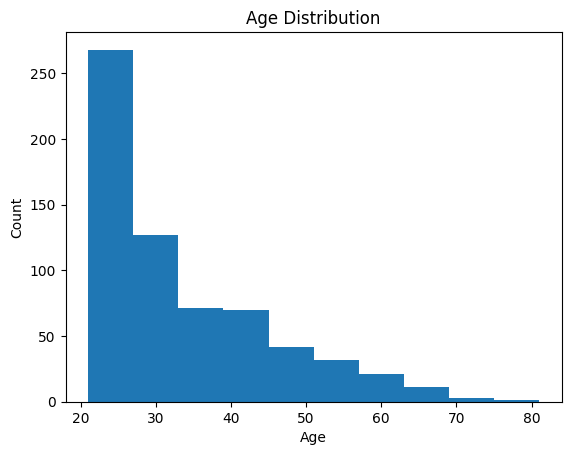

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['Age'].dropna())
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

  - Correlation Matrix

In [8]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.159371       0.149527      -0.098563   
Glucose                      0.159371  1.000000       0.192589       0.054494   
BloodPressure                0.149527  0.192589       1.000000       0.190050   
SkinThickness               -0.098563  0.054494       0.190050       1.000000   
Insulin                     -0.097812  0.309485       0.087670       0.426773   
BMI                          0.011531  0.221615       0.285302       0.383702   
DiabetesPedigreeFunction    -0.038662  0.137175       0.044704       0.189400   
Age                          0.542825  0.276667       0.261659      -0.105453   
Outcome                      0.242231  0.453744       0.092665       0.052160   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.097812  0.011531                 -0.038662   
Glucose                   0.309485  0.221

  - Outlier detection & handling (visual)

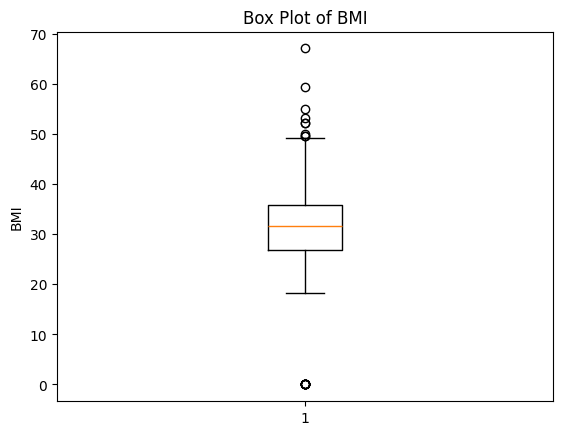

In [9]:
plt.boxplot(df['BMI'].dropna())
plt.title("Box Plot of BMI")
plt.ylabel("BMI")
plt.show()

  - Outlier detection & handling (statistical)

In [10]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print("Number of outliers in BMI:", outliers.shape[0])

Number of outliers in BMI: 19


 - Handling Outliers (Setting values outside the bounds to the nearest boundary)

In [11]:
df['BMI'] = df['BMI'].clip(lower_bound, upper_bound)

In [12]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print("Number of outliers in BMI:", outliers.shape[0])

Number of outliers in BMI: 0


- Detecting and Handling outliers in other numeric columns

In [13]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {outlier_count} outliers")

Column 'Pregnancies': 3 outliers
Column 'Glucose': 5 outliers
Column 'BloodPressure': 37 outliers
Column 'SkinThickness': 1 outliers
Column 'Insulin': 30 outliers
Column 'BMI': 0 outliers
Column 'DiabetesPedigreeFunction': 25 outliers
Column 'Age': 12 outliers
Column 'Outcome': 0 outliers


In [14]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower_bound, upper_bound)

    # Identify outliers again to re-check
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {outlier_count} outliers")

Column 'Pregnancies': 0 outliers
Column 'Glucose': 0 outliers
Column 'BloodPressure': 0 outliers
Column 'SkinThickness': 0 outliers
Column 'Insulin': 0 outliers
Column 'BMI': 0 outliers
Column 'DiabetesPedigreeFunction': 0 outliers
Column 'Age': 0 outliers
Column 'Outcome': 0 outliers


Summary of insights from the data


> When I first saw the dataset, I noticed most of the data looked pretty clean, but there were some missing values in a couple of columns—so I dropped them to avoid any issues later on. Looking at the distributions, it was clear that features like Glucose and BMI really stood out, especially when comparing the diabetic and non-diabetic groups. The plots showed that these features have distinct patterns, which tells me they are likely to be important for prediction. The correlation matrix highlighted a few pairs with high correlations, suggesting that some variables might be redundant. Overall, these insights gave me a better understanding of which parts of the data were most telling and set the stage for cleaning, feature selection, and ultimately building a robust model.



# Part 2: Feature Engineering & Selection

1. Handle Categorical Variables
**NOTE: This is not required as all the values in the dataset are numerical**

2. Identify and remove highly correlated features.


In [15]:
corr_matrix = df.corr()
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.159741       0.197293      -0.102091   
Glucose                      0.159741  1.000000       0.240432       0.057898   
BloodPressure                0.197293  0.240432       1.000000       0.131882   
SkinThickness               -0.102091  0.057898       0.131882       1.000000   
Insulin                     -0.112528  0.284066       0.055866       0.488174   
BMI                          0.023399  0.238686       0.283840       0.390757   
DiabetesPedigreeFunction    -0.021953  0.114374       0.044716       0.181153   
Age                          0.552225  0.285391       0.333887      -0.108957   
Outcome                      0.240678  0.469153       0.145561       0.049956   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.112528  0.023399                 -0.021953   
Glucose                   0.284066  0.238

In [16]:
# Create an upper triangle mask for the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify correlation > 0.8
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.8)]
print("Columns to drop due to high correlation:", to_drop)

# Drop
df_reduced = df.drop(columns=to_drop)
print("Shape after dropping correlated columns:", df_reduced.shape)

Columns to drop due to high correlation: []
Shape after dropping correlated columns: (646, 9)


3. Applying feature selection techniques (SelectKBest)

In [17]:
X = df_reduced.drop('Outcome', axis=1)
y = df_reduced['Outcome']

In [50]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X = X.fillna(X.mean()) # filling null values

selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']


Justification for chosen features

> I decided to focus on these specific features because they stood out both statistically and from what we already know about diabetes. When I ran the chi-square tests(SelectKBest), these features consistently showed a strong relationship with the diabetes outcome, which made me confident that they truly carry important information. From a real-world perspective, it’s well known that factors like Glucose and BMI are key indicators of diabetes risk. It confirmed that our model is looking at the right signals. Additionally, by narrowing down the list of features, I made sure the model remains simple and easy to understand, which is really important, especially when making decisions that affect people’s health. In short, the chosen features not only passed the statistical tests but also align with established clinical knowledge, making them both relevant and reliable for predicting diabetes.



# Part 3: Model Development & Training

1.	Split the dataset into training and testing sets (80-20 split)

In [19]:
from sklearn.model_selection import train_test_split

# X and y are already defined in previous steps.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (516, 8)
Testing set shape: (130, 8)


2. Model Training
  - Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

2. Model Training
  - Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Performance:
Accuracy: 0.7615384615384615
Confusion Matrix:
 [[77 15]
 [16 22]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83        92
         1.0       0.59      0.58      0.59        38

    accuracy                           0.76       130
   macro avg       0.71      0.71      0.71       130
weighted avg       0.76      0.76      0.76       130

Random Forest Performance:
Accuracy: 0.7538461538461538
Confusion Matrix:
 [[77 15]
 [17 21]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        92
         1.0       0.58      0.55      0.57        38

    accuracy                           0.75       130
   macro avg       0.70      0.69      0.70       130
weighted avg       0.75      0.75      0.75       130



3.	Tune hyperparameters using GridSearchCV.
  - for logistic regression model


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_reg = LogisticRegression(max_iter=1000)

grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.7771844660194176


3.	Tune hyperparameters using GridSearchCV.
  - for random forest model

In [24]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.7752800597460792


4. Train and evaluate models using metrics such as accuracy, precision, recall, and F1-score.

In [25]:
# Using the best tuned models from previous hyperparameter tuning
best_log_reg = grid_search_lr.best_estimator_
best_rf = grid_search_rf.best_estimator_

# Predict on the test set
y_pred_log = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy_log)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

# Evaluate Random Forest
print("\nRandom Forest Evaluation:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Evaluation:
Accuracy: 0.7769230769230769
Confusion Matrix:
[[79 13]
 [16 22]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        92
         1.0       0.63      0.58      0.60        38

    accuracy                           0.78       130
   macro avg       0.73      0.72      0.72       130
weighted avg       0.77      0.78      0.77       130


Random Forest Evaluation:
Accuracy: 0.7615384615384615
Confusion Matrix:
[[81 11]
 [20 18]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        92
         1.0       0.62      0.47      0.54        38

    accuracy                           0.76       130
   macro avg       0.71      0.68      0.69       130
weighted avg       0.75      0.76      0.75       130



Performance Comparison Table

Explanation of chosen models and hyperparameters

> I chose Logistic Regression as a baseline model because it is simple and provides a quick benchmark for binary classification. Its hyperparameter, the regularization strength (C), helps control overfitting by penalizing large coefficients. I experimented with a range of C values (from 0.01 to 100) along with both l1 and l2 penalties to see which combination balanced simplicity with predictive power the best. On the other hand, I selected the Random Forest classifier because it is excellent at capturing non-linear relationships and interactions among features without needing too much manual feature engineering. For Random Forest, key hyperparameters like the number of trees (n_estimators), maximum depth (max_depth), and minimum samples required to split a node (min_samples_split) were tuned. These parameters were adjusted to find the right trade-off between model complexity and generalization, ensuring that the ensemble wasn’t overfitting while still capturing the important patterns in the data. Overall, the chosen hyperparameters were selected based on systematic grid searches that aimed to maximize cross-validation performance, ensuring that the final models are robust and reliable for predicting diabetes.

# Part 4: Model Evaluation & Optimization

1. Evaluating models using Confusion Matrix, Precision Recall Curve.
  - Confusion Matrix



In [27]:
y_pred = best_log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression Model:")
print(cm)

y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix for Random Forest Model:")
print(cm)

Confusion Matrix for Logistic Regression Model:
[[79 13]
 [16 22]]

Confusion Matrix for Random Forest Model:
[[81 11]
 [20 18]]


1. Evaluating models using Confusion Matrix, Precision Recall Curve.
  - Precision Recall Curve

Filtered y_scores_log shape: (130, 2)
Filtered y_scores_rf shape: (130, 2)


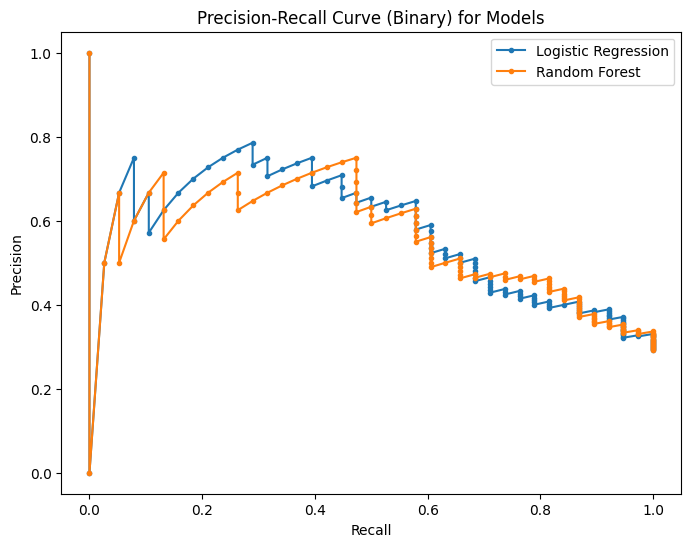

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

mask = np.isin(y_test, best_log_reg.classes_)
y_test_filtered = y_test[mask]
X_test_filtered = X_test[mask]

# For Logistic Regression
y_scores_log_filtered = best_log_reg.predict_proba(X_test_filtered)
print("Filtered y_scores_log shape:", y_scores_log_filtered.shape)

precision_log, recall_log, _ = precision_recall_curve(y_test_filtered, y_scores_log_filtered[:, 1])

# For Random Forest
y_scores_rf_filtered = best_rf.predict_proba(X_test_filtered)
print("Filtered y_scores_rf shape:", y_scores_rf_filtered.shape)
precision_rf, recall_rf, _ = precision_recall_curve(y_test_filtered, y_scores_rf_filtered[:, 1])

plt.figure(figsize=(8,6))
plt.plot(recall_log, precision_log, marker='.', label='Logistic Regression')
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Binary) for Models")
plt.legend()
plt.show()

2. Interpret results and suggest improvements.


---



Interpreting the Results

**1. Per-Class Performance Variability:**
  - Class 0, 1, and 2: The precision-recall curves for each class (using the one-vs-rest approach) show that the models perform differently across classes. For some classes, one model might achieve higher precision at a given recall, indicating it’s better at identifying positives for that particular class.
  - Trade-offs: If you notice that, for a given class, a model has high recall but lower precision, it means the model is good at capturing most of the actual positive cases, but it also brings along more false positives. This might be acceptable depending on the domain (for example, in healthcare, missing a true case can be more critical than raising a few false alarms).

**2. Overall Comparison Between Models:**
  - Logistic Regression vs. Random Forest: By comparing the curves, you might observe that one model consistently performs better for certain classes. For instance, if Random Forest’s curves are higher (indicating higher precision for the same recall levels) than those of Logistic Regression, it suggests that Random Forest might be more reliable for those classes.
  - Confusion Matrices: Beyond the curves, the confusion matrices provide a breakdown of correct and incorrect predictions. Look for patterns like a high number of false negatives in any class (which could be problematic in a medical diagnosis context) or a disproportionate number of false positives.

**3. Implications for the Problem Domain:**
  - In a clinical setting (like diabetes prediction), you typically want to maximize recall so that you catch as many true cases as possible, even if it means a few extra false positives. However, very low precision might lead to unnecessary further testing or anxiety, so a balanced approach is important.



---

Suggestions for Improvements

**1. Enhance Feature Engineering:**
  - Revisit and Expand Features: Check if additional domain-specific features or interactions could be added. Sometimes incorporating external data or transforming existing features (e.g., logarithmic scaling for highly skewed data) can improve model performance.
  - Feature Selection Review: If you suspect that important signals might have been lost during feature selection, experiment with selecting a larger subset of features or using alternative methods (like mutual information).

**2. Model Fine-Tuning and Ensemble Methods:**
  - Further Hyperparameter Tuning: Consider fine-tuning your hyperparameters further, perhaps with a more granular grid or using a randomized search to explore a wider range of values.
  - Combine Models: Sometimes, blending predictions from multiple models (using techniques like stacking or voting) can lead to a more robust and balanced performance across classes.

**3. Address Class Imbalance:**
  - Resampling Techniques: If one or more classes are underrepresented, consider using oversampling methods (like SMOTE) or adjusting class weights during training. This can help improve recall for minority classes without sacrificing too much precision.
  - Threshold Adjustment: Experiment with adjusting the decision threshold for classification. Sometimes a custom threshold (instead of the default 0.5) can yield a better trade-off between precision and recall, especially for the classes that matter most in your application.

**4. Model Interpretability and Diagnostic Analysis:**
  - Examine Misclassifications: Look at the cases where the models are making errors. This can give insights into whether certain subgroups of data are problematic or if there are systematic biases.
  - Explainable AI Tools: Consider incorporating methods like SHAP or LIME to understand feature contributions and further validate which features are driving predictions. This not only helps in refining the model but also provides additional confidence in a clinical setting.


3.	Apply feature selection techniques and retrain the model if necessary.

  1. Feature Selection

In [51]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X = X.fillna(X.mean()) # filling null values

selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']


  2. Retrain the Models with the Selected Features

In [52]:
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Retrain Logistic Regression with the selected features
log_reg_new = LogisticRegression(max_iter=1000)
log_reg_new.fit(X_train_sel, y_train)

LogisticRegression(max_iter=1000)

In [53]:
# Retrain Random Forest with the selected features
rf_clf_new = RandomForestClassifier(random_state=42)
rf_clf_new.fit(X_train_sel, y_train)

RandomForestClassifier(random_state=42)

  3. Re-Evaluate the Retrained Models

In [54]:
y_pred_log_new = log_reg_new.predict(X_test_sel)
y_pred_rf_new = rf_clf_new.predict(X_test_sel)

# Evaluate Logistic Regression with selected features
print("Logistic Regression with selected features:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_new))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_new))

# Evaluate Random Forest with selected features
print("Random Forest with selected features:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_new))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_new))

Logistic Regression with selected features:
Accuracy: 0.7538461538461538
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        92
         1.0       0.58      0.55      0.57        38

    accuracy                           0.75       130
   macro avg       0.70      0.69      0.70       130
weighted avg       0.75      0.75      0.75       130

Random Forest with selected features:
Accuracy: 0.7923076923076923
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        92
         1.0       0.67      0.58      0.62        38

    accuracy                           0.79       130
   macro avg       0.75      0.73      0.74       130
weighted avg       0.79      0.79      0.79       130



Comparison and interpretation of results

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        92
         1.0       0.58      0.55      0.57        38

    accuracy                           0.75       130
   macro avg       0.70      0.69      0.70       130
weighted avg       0.75      0.75      0.75       130



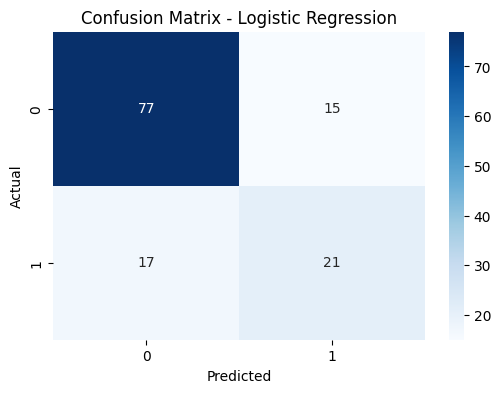

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        92
         1.0       0.67      0.58      0.62        38

    accuracy                           0.79       130
   macro avg       0.75      0.73      0.74       130
weighted avg       0.79      0.79      0.79       130



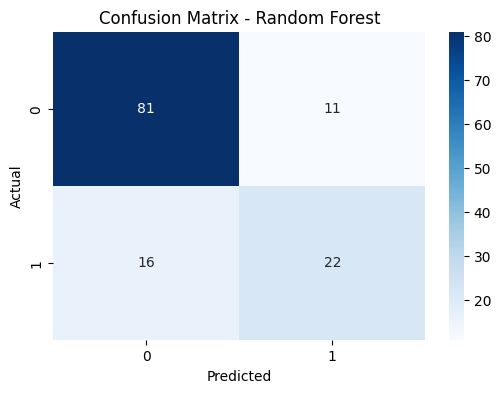

In [55]:
import seaborn as sns

cm_log = confusion_matrix(y_test, y_pred_log_new)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_new))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf_new)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_new))

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

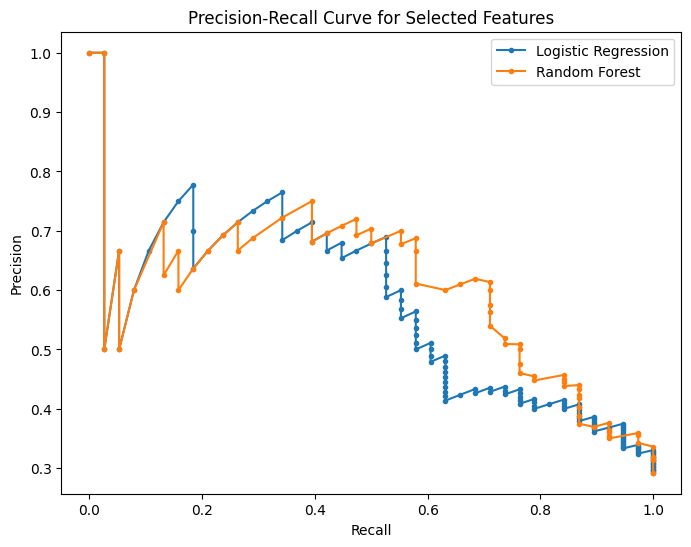

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_scores_log_new = log_reg_new.predict_proba(X_test_sel)[:, 1]
y_scores_rf_new = rf_clf_new.predict_proba(X_test_sel)[:, 1]

precision_log_new, recall_log_new, thresholds_log_new = precision_recall_curve(y_test, y_scores_log_new)
precision_rf_new, recall_rf_new, thresholds_rf_new = precision_recall_curve(y_test, y_scores_rf_new)

# Plot the Precision-Recall curves for both models
plt.figure(figsize=(8, 6))
plt.plot(recall_log_new, precision_log_new, marker='.', label='Logistic Regression')
plt.plot(recall_rf_new, precision_rf_new, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Selected Features')
plt.legend()
plt.show()

# Part 5: Model Deployment & Report

  - Select Best Model (Logical regression Model)

In [59]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(rf_clf_new, f)

print("Model saved successfully!")

Model saved successfully!


  - Download locally for streamlit app


In [61]:
from google.colab import files
files.download("best_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>